## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## Importing the dataset

In [2]:
sales_df=pd.read_csv('advertising.csv')

In [3]:
sales_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
sales_df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


## Dimension of the dataset

In [6]:
print("Dimensions of the sales dataset:",sales_df.shape[0], "rows and", sales_df.shape[1], "columns")

Dimensions of the sales dataset: 200 rows and 4 columns


## Checking for null values

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
sales_df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Description of the dataset

In [9]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Histogram of Sales Distribution

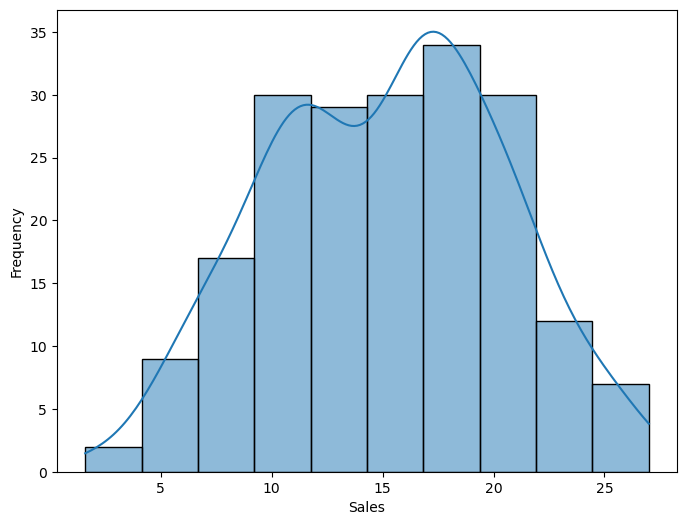

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(sales_df['Sales'],kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

## Boxplot for analysing the outliers

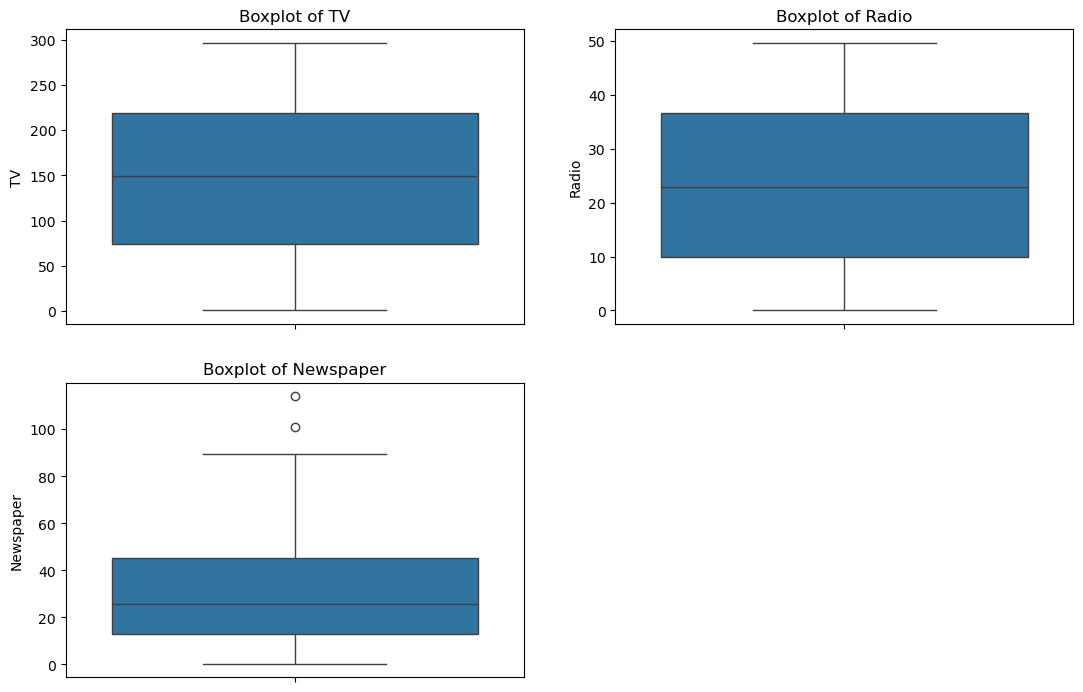

In [11]:
plt.figure(figsize=(13,13))

plt.subplot(3,2,1)
sns.boxplot(y="TV",data=sales_df)
plt.title("Boxplot of TV")

plt.subplot(3,2,2)
sns.boxplot(y="Radio",data=sales_df)
plt.title("Boxplot of Radio")

plt.subplot(3,2,3)
sns.boxplot(y="Newspaper",data=sales_df)
plt.title("Boxplot of Newspaper")

plt.show()

## Pairplot for analyzing the relations of the attributes

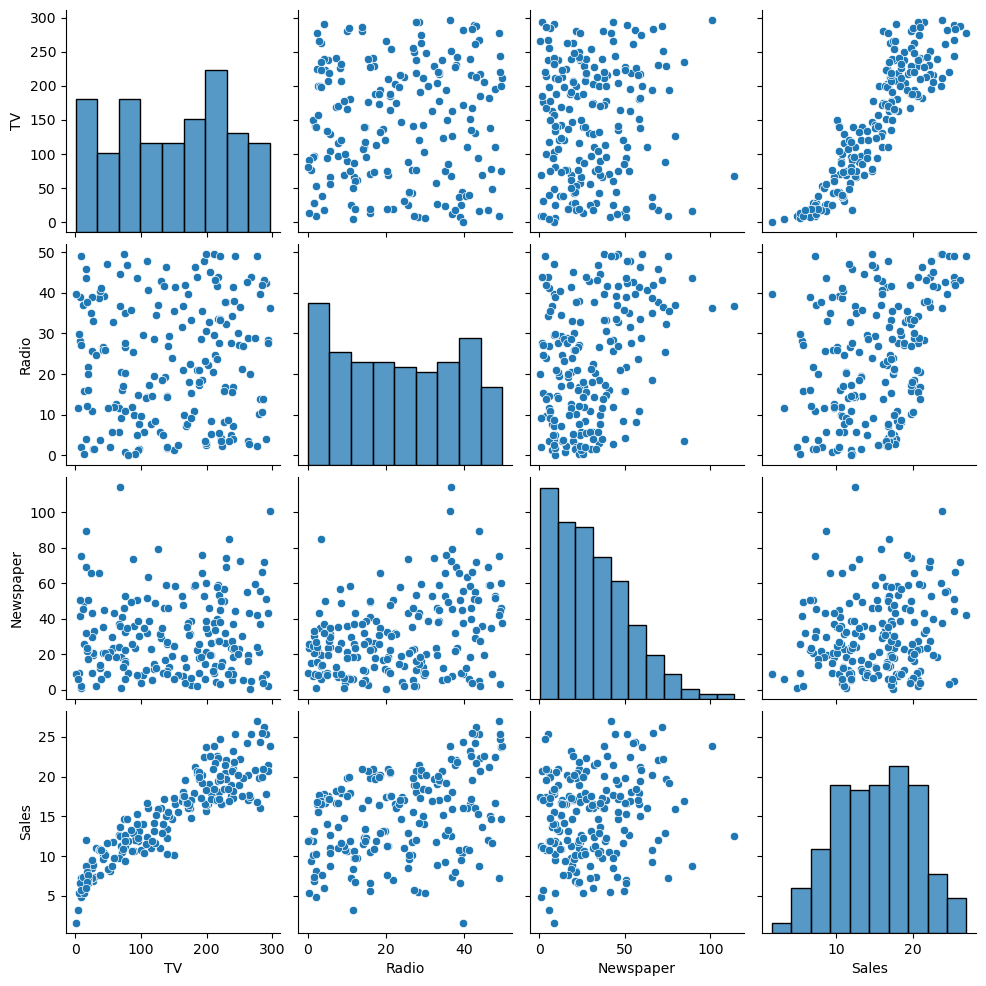

In [12]:
sns.pairplot(sales_df)
plt.show()

## Correlation of the attributes

In [13]:
correlation=sales_df.corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


## Heatmap of the correlation of the attributes

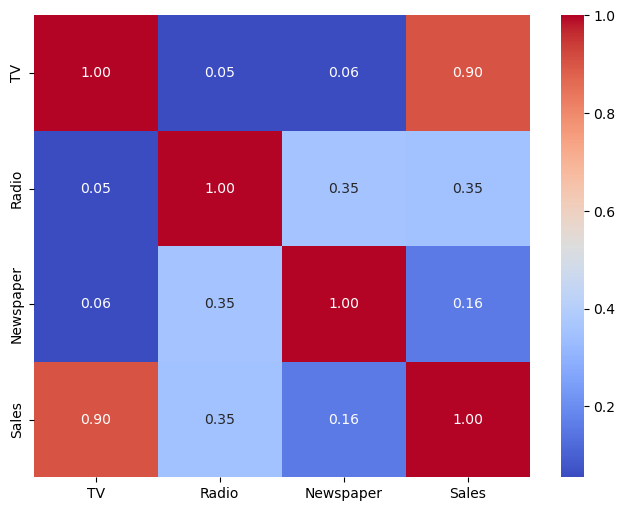

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

# Simple Linear Regression

### Defining the features and target variables 

In [15]:
X=sales_df[['TV']]
y=sales_df['Sales']

### Splitting the dataset into train and test

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

### Model Training

In [17]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred=model.predict(X_test)
y_pred

array([16.72249708,  8.28501972, 18.28141063, 18.75363627, 21.7178478 ,
       12.30747184, 16.50629739, 11.10699462, 15.37978322,  8.18829881,
        8.85965574,  9.30343405, 16.34130289, 21.87146337, 20.37513394,
        9.95772258, 16.75663387, 10.15116441, 19.0950042 ,  9.00758184,
       19.26568816,  7.87537821, 23.29951921, 15.2830623 , 17.63281156,
       10.52097967, 20.31254982, 16.44371327, 14.89048918, 16.11941373,
       20.59702309, 19.85170311, 21.29113789, 15.27737284, 13.64449624,
       11.0444105 , 14.21913225, 22.93539342, 17.04679661, 20.91563316])

### Model Evaluation
#### Mean Squared Error(M.S.E), Mean Absolute Error(M.A.E), R-Squared Score(R2)

In [19]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [20]:
print("Simple Linear Regression")
print(f"Intercept:{model.intercept_:.2f}")
print(f"Coefficient for TV:{model.coef_[0]:.4f}")
print(f"MSE:{mse:.2f}")
print(f"MAE:{mae:.2f}")
print(f"R2 Score:{r2:.4f}")

Simple Linear Regression
Intercept:6.76
Coefficient for TV:0.0569
MSE:5.36
MAE:1.70
R2 Score:0.7351


# Multiple Linear Regression

### Defining the features and target variable

In [21]:
X_mlr=sales_df[['TV','Radio','Newspaper']]
y_mlr=sales_df['Sales']

### Splitting the dataset into train and test

In [22]:
X_mlr_train,X_mlr_test,y_mlr_train,y_mlr_test=train_test_split(X_mlr,y_mlr,test_size=0.2,random_state=45)

### Model Training

In [23]:
model_mlr=LinearRegression()
model_mlr.fit(X_mlr_train,y_mlr_train)

LinearRegression()

In [24]:
y_mlr_pred=model_mlr.predict(X_mlr_test)
y_mlr_pred

array([16.62010098,  9.53554692, 18.12705406, 21.52568212, 19.51015336,
       10.77744976, 18.24735828, 11.60718803, 17.22670479,  8.54573405,
       10.50797851,  9.74780444, 14.65580426, 21.53322592, 19.4614702 ,
        8.16998001, 16.0082429 ,  8.98565811, 21.28722242, 11.18094523,
       20.24957669,  7.7441694 , 21.17385726, 12.93924951, 18.24267992,
        8.75691188, 21.53401211, 14.73605318, 15.64196568, 15.78674195,
       23.2403726 , 21.18742201, 21.6902299 , 16.73322329, 11.99755616,
       10.80772394, 16.37803559, 21.53086112, 15.55347347, 21.26892783])

### Model Evaluation
#### Mean Squared Error(M.S.E), Mean Absolute Error(M.A.E), R-Squared Score(R2)

In [25]:
mse_mlr=mean_squared_error(y_mlr_test,y_mlr_pred)
mae_mlr=mean_absolute_error(y_mlr_test,y_mlr_pred)
r2_mlr=r2_score(y_mlr_test,y_mlr_pred)

In [26]:
print("Multiple Linear Regression")
print(f"Intercept:{model_mlr.intercept_:.2f}")
coefficients=pd.DataFrame(model_mlr.coef_,X_mlr.columns,columns=['Coefficient'])
print(coefficients)
print(f"MSE:{mse_mlr:.2f}")
print(f"MAE:{mae_mlr:.2f}")
print(f"R2 Score:{r2_mlr:.4f}")

Multiple Linear Regression
Intercept:4.54
           Coefficient
TV            0.055806
Radio         0.108484
Newspaper    -0.004292
MSE:3.04
MAE:1.39
R2 Score:0.8495


### Visualising the actual and predicted sales of both the models

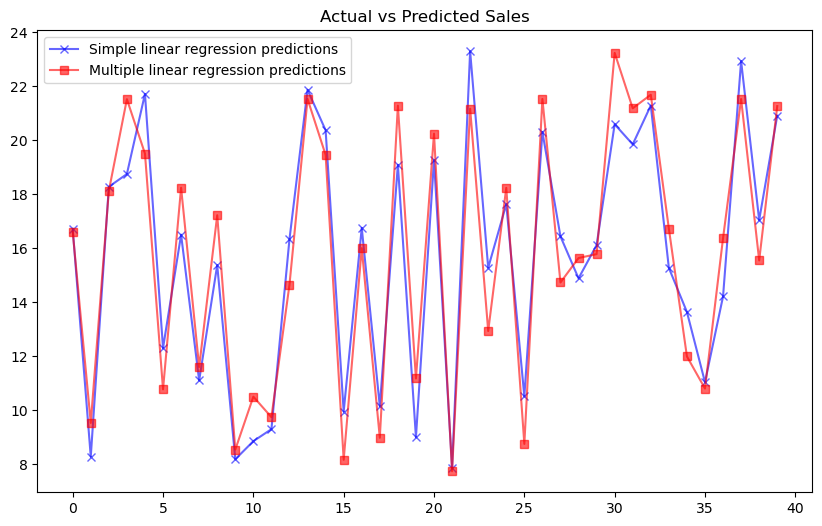

In [27]:
plt.figure(figsize=(10,6))
plt.plot(y_pred,color='blue',alpha=0.6,label='Simple linear regression predictions',marker='x')
plt.plot(y_mlr_pred,color='red',alpha=0.6,label='Multiple linear regression predictions',marker='s')
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

### Comparision of the results of both the models

In [28]:
compare_df=pd.DataFrame({
    "Model":["Simple Linear Regression","Multiple Linear Regression"],
    "MSE":[mse,mse_mlr],
    "MAE":[mae,mae_mlr],
    "R2 Score":[r2,r2_mlr]
})
print("\nModel Comparison:")
print(compare_df)


Model Comparison:
                        Model       MSE       MAE  R2 Score
0    Simple Linear Regression  5.359314  1.695915  0.735077
1  Multiple Linear Regression  3.044412  1.387039  0.849508
